<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW10_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 422 Section 3.5 - K-means.
K-means is a method of taking data from a dataset and clustering the data together to its nearest mean where variance is minimized. This computational method creates centroids of all the data that is near each other.


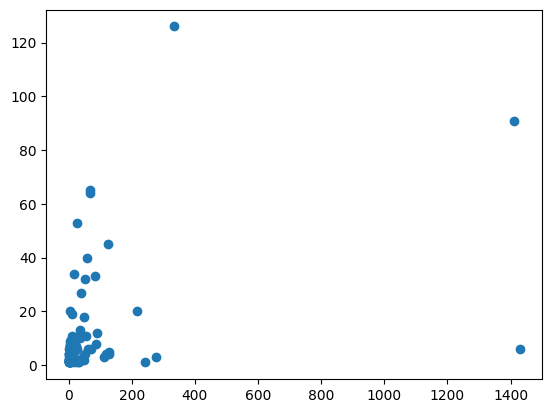

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MAT 422 - Ivan Matyushov

# Section 3.5 - K-means

#Using olympics-economics.csv dataset
df = pd.read_csv('olympics-economics.csv')
total = df['total'] #Total medals won
pop = df['population']

plt.scatter(pop, total)
plt.show()


The elbow method is a way to determine the optimal number of clusters to use for a k-means estimation. The point on the graph where the line forms an elbow is the optimal point for clusters. The within-sum-of-squares need to hit a near minima. Here I found the 'elbow' to start at a cluster number of 3.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (89) found smaller than n_clusters (90). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


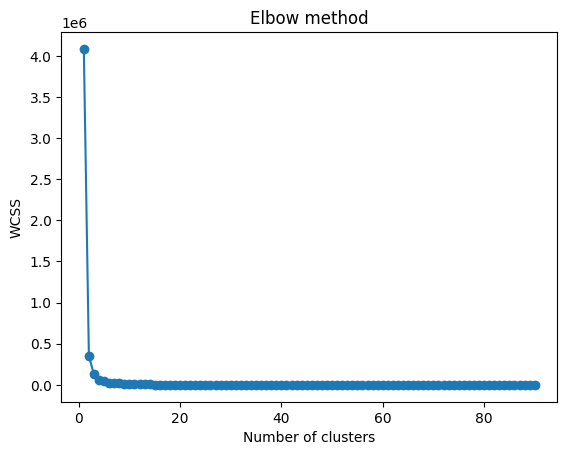

In [3]:
from sklearn.cluster import KMeans

data = list(zip(total, pop)) #zip function makes tuples of pairs of data from dataset.
wcss = []

for i in range(1,91):
    kmeans = KMeans(n_clusters=i) #uses k-means package to calculate WCSS
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,91), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here, we recolor the data into its clusters to show the 3 clusters that were made out of our original data using the k-means method.

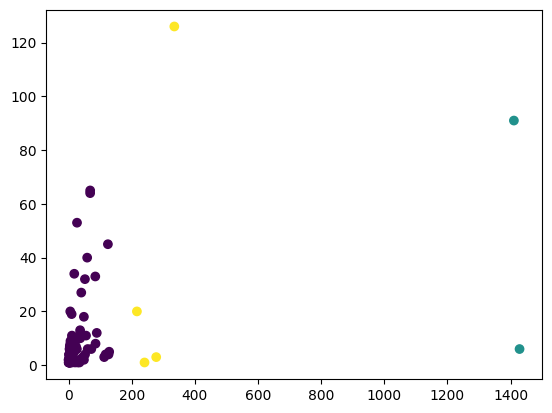

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(pop, total, c=kmeans.labels_)
plt.show()

Support Vector Machines help predict future data points by splitting up data by a hyperplane and margins. It can take future data, see where it lands with resepct to the hyperplane and make a prediction in that general area.

In [5]:
# Section 3.6 - Support Vector Machine
import math
df1 = pd.read_csv('Health_Sleep_Statistics.csv')
new_df = df1.loc[:, ['Steps', 'Sleep', 'Medication']]
nrows = math.floor(new_df.shape[0] * 0.8) #partiiton data to train on 80% of data points

training = new_df.loc[:nrows]
test = new_df.loc[nrows:]

print(training) #One can see there are 80 training entries
print(test) #One can see there are 80 testing entries

from sklearn.svm import SVC
model = SVC()
model.fit(training[["Steps", "Sleep"]], training["Medication"])

predict = model.predict(test[["Steps", "Sleep"]]) #predict models from rest of data set

accu = sum(test["Medication"] == predict) / test.shape[0] #compares accuracy of predictions

print(predict)
print(accu)

      Steps  Sleep  Medication
0    8000.0    8.0         0.0
1    5000.0    7.0         1.0
2    9000.0    9.0         0.0
3    4000.0    5.0         0.0
4   10000.0    8.0         0.0
..      ...    ...         ...
76   8500.0    8.0         0.0
77   4000.0    5.0         0.0
78   9000.0    9.0         0.0
79   6500.0    7.0         0.0
80   8500.0    8.0         0.0

[81 rows x 3 columns]
     Steps  Sleep  Medication
80  8500.0    8.0         0.0
81  3000.0    4.0         1.0
82  9500.0    9.0         0.0
83  5000.0    6.0         0.0
84  8500.0    8.0         0.0
85  4000.0    5.0         0.0
86  9000.0    9.0         0.0
87  6500.0    7.0         0.0
88  8500.0    8.0         0.0
89  3000.0    4.0         1.0
90  9500.0    9.0         0.0
91  5000.0    6.0         0.0
92  8500.0    8.0         0.0
93  4000.0    5.0         0.0
94  9000.0    9.0         0.0
95  6500.0    7.0         0.0
96  8500.0    8.0         0.0
97  3000.0    4.0         1.0
98  9500.0    9.0         0.0
99  5

The model predicted that based on the testing data, all of the users were not using any medications. If you see the printed test dataset from before, you will see 3 of the entries were using medications. Hence, an accuracy score of 17/20 or 0.85.